In [2]:
import pandas as pd
df = pd.read_csv("mushroom.csv")
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

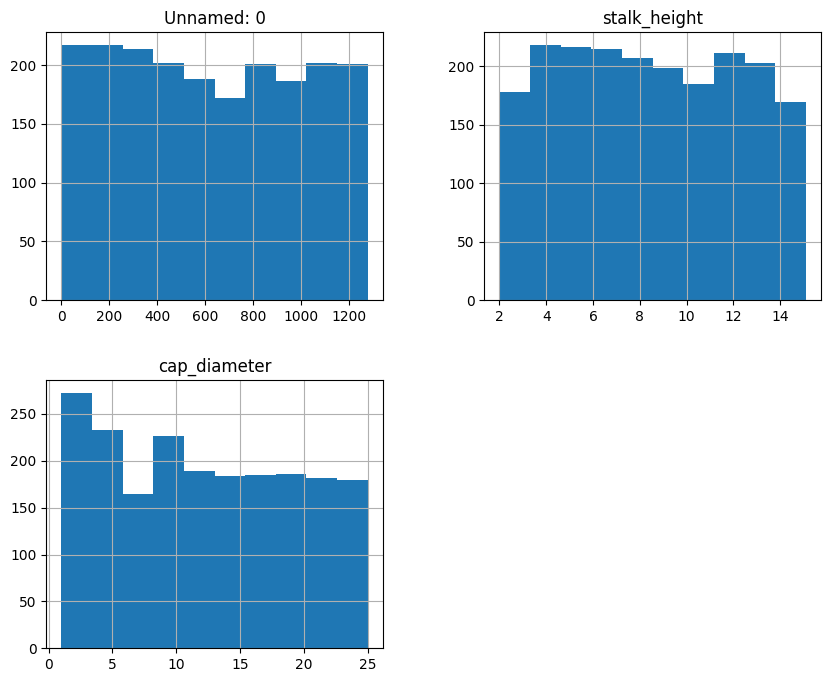

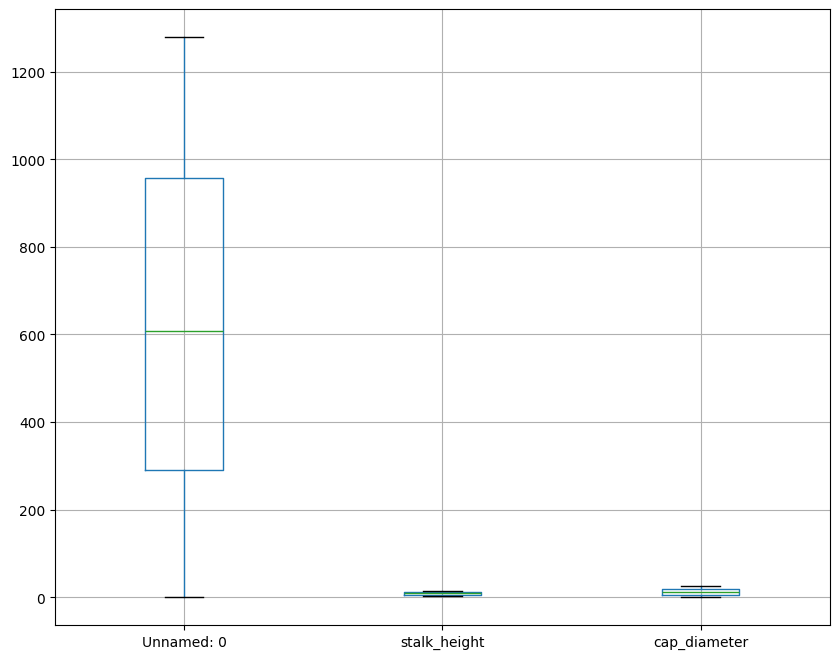

In [4]:
import matplotlib.pyplot as plt

# Plot the distribution of each column
df.hist(figsize=(10, 8))
plt.show()

# Plot the correlation matrix
import seaborn as sns


# Plot the boxplots of each column
df.boxplot(figsize=(10, 8))
plt.show()

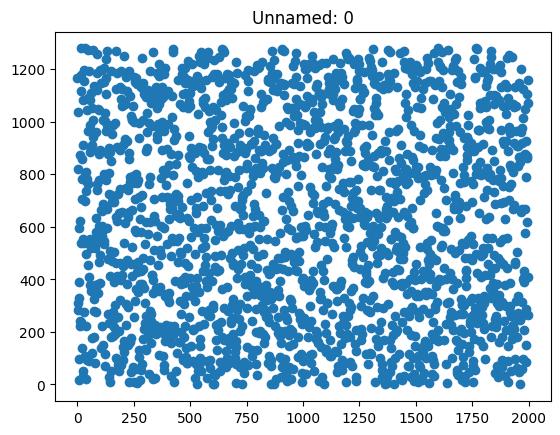

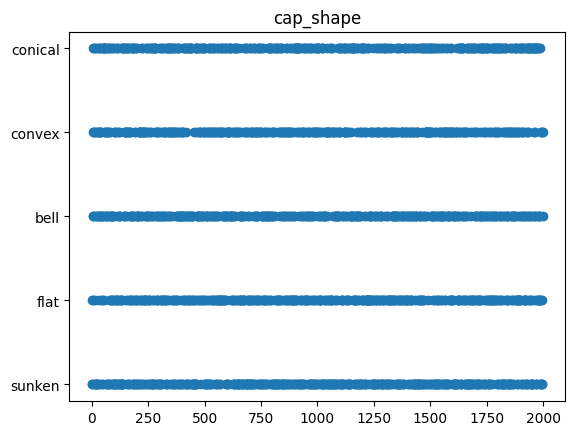

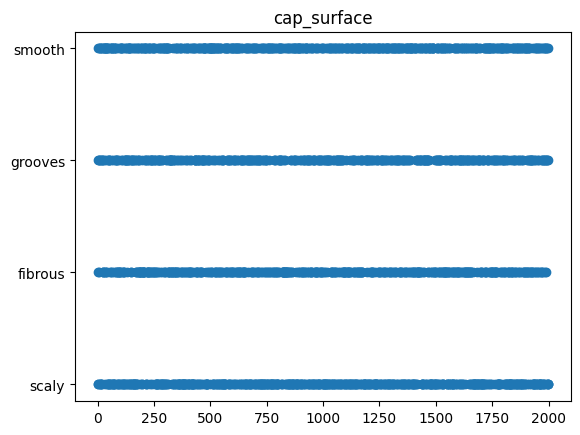

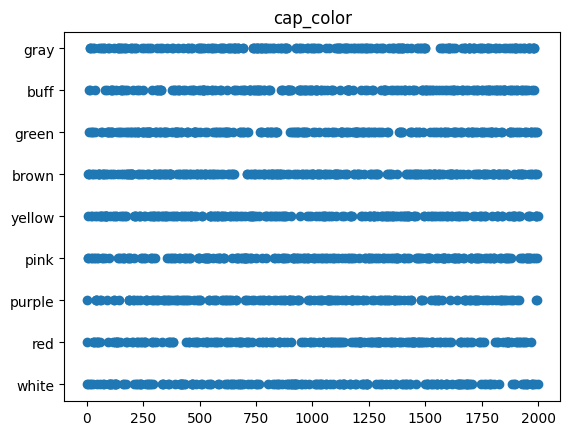

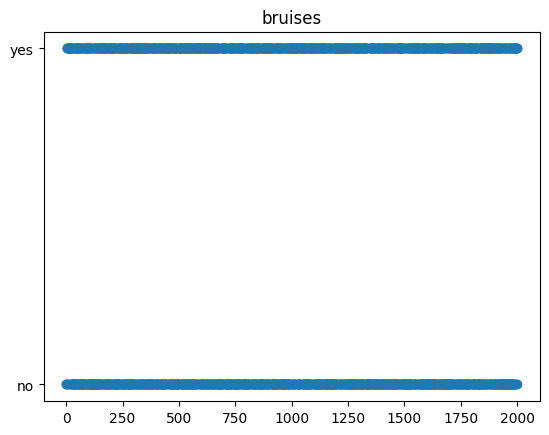

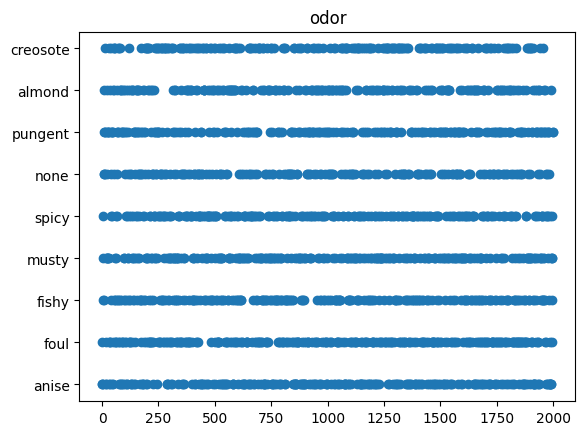

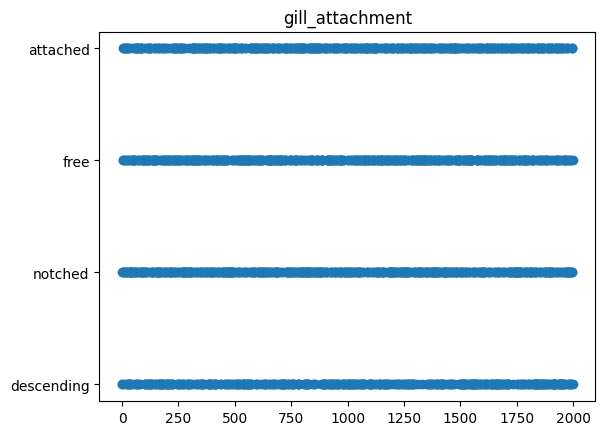

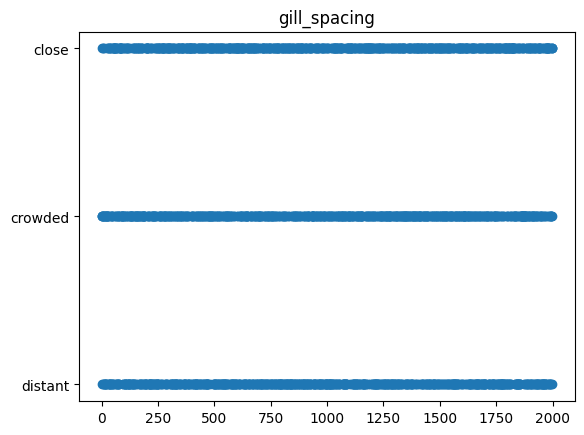

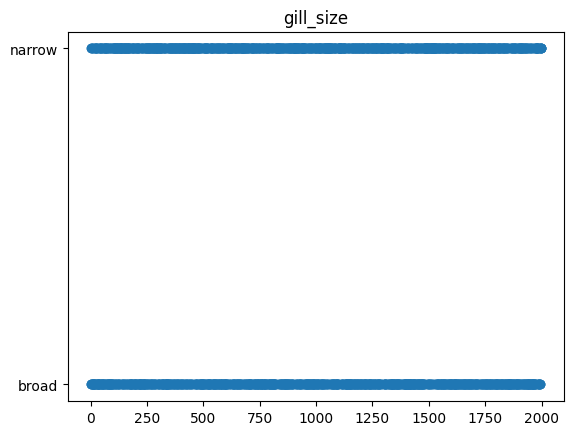

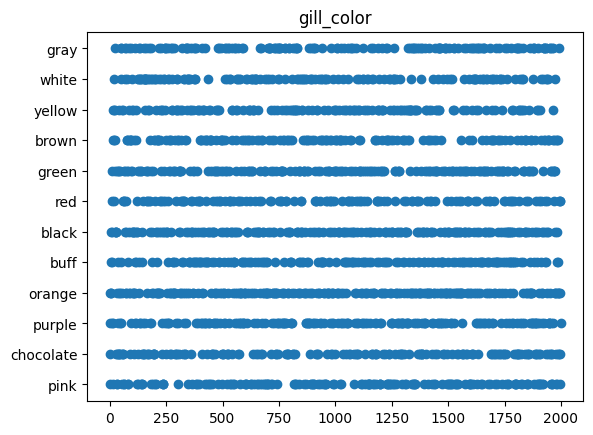

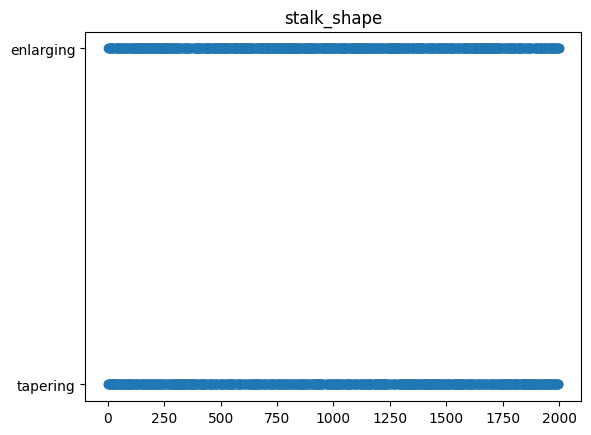

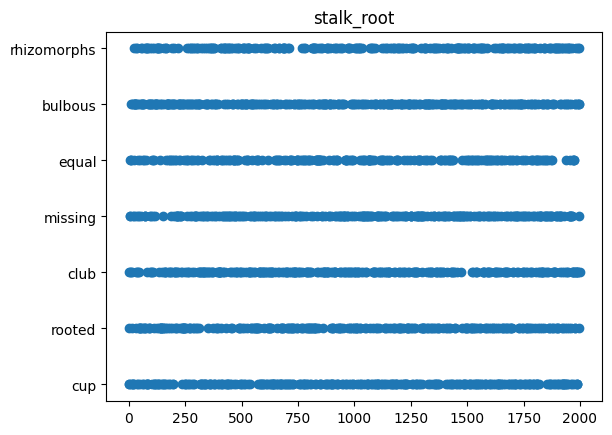

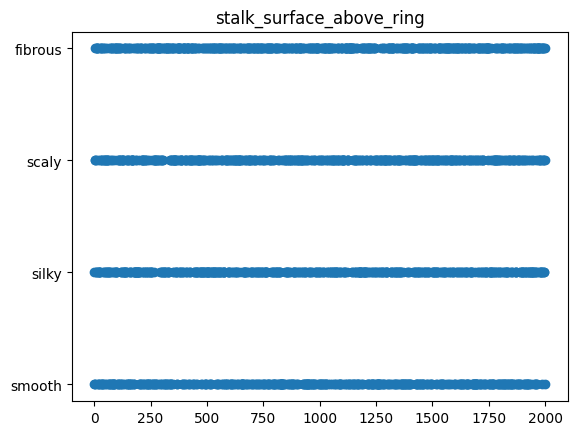

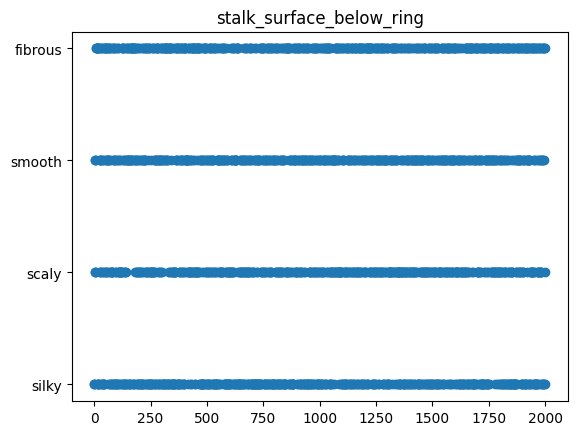

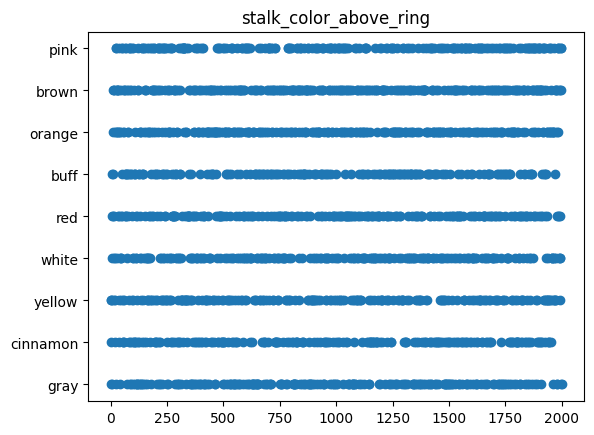

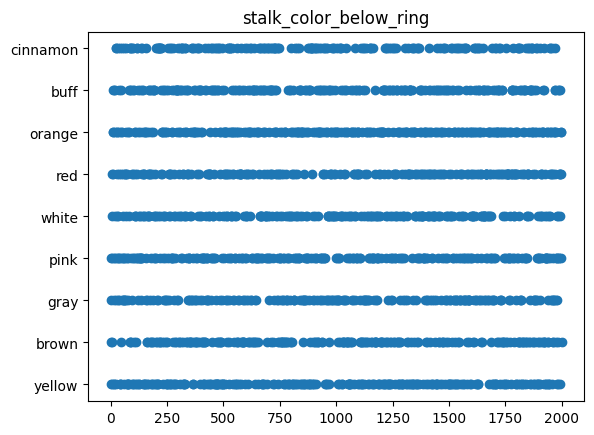

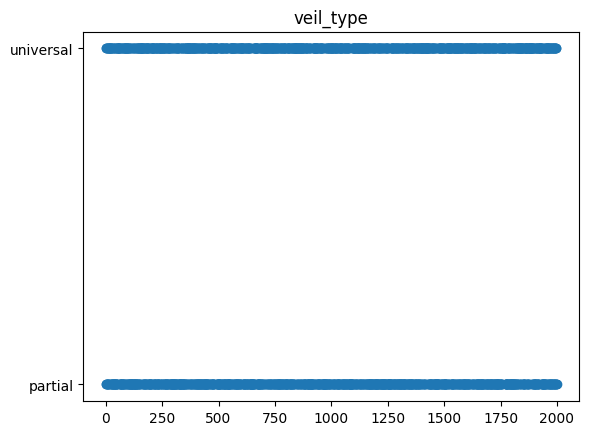

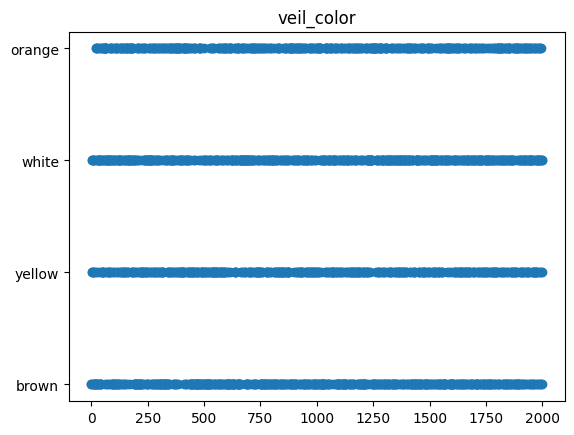

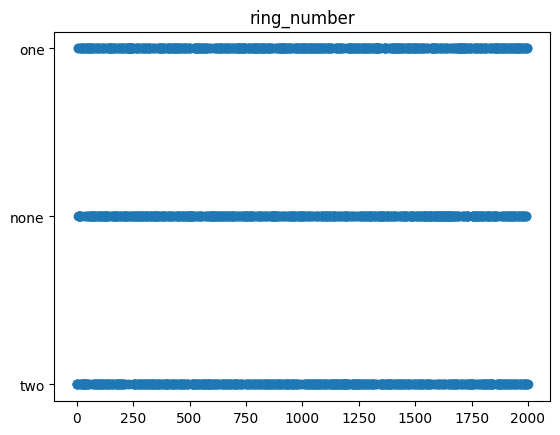

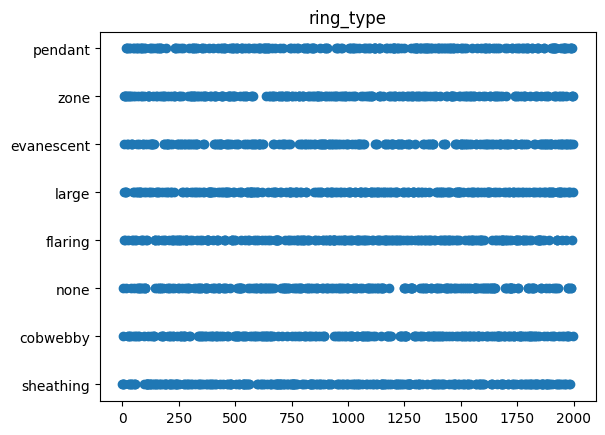

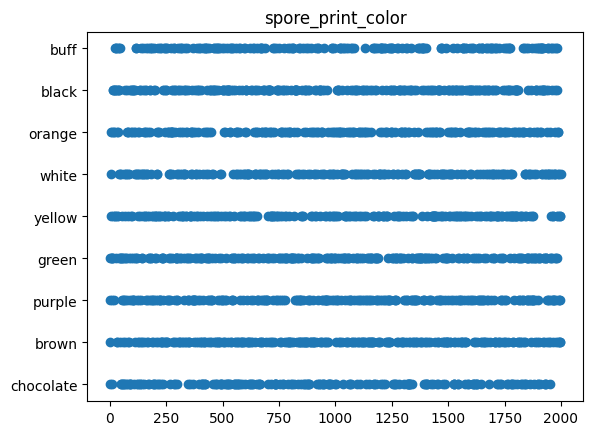

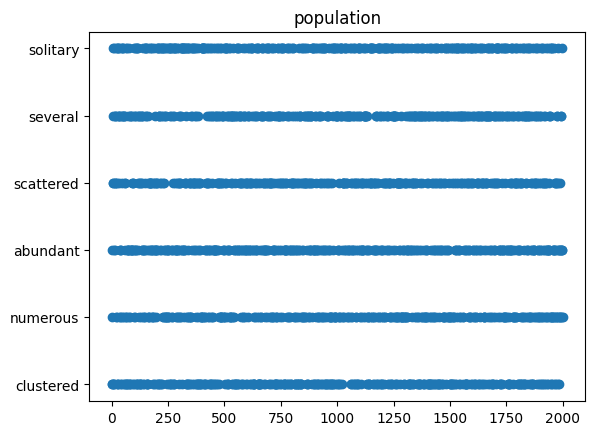

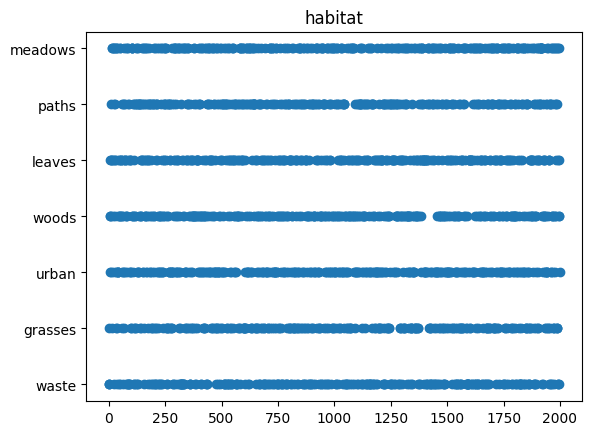

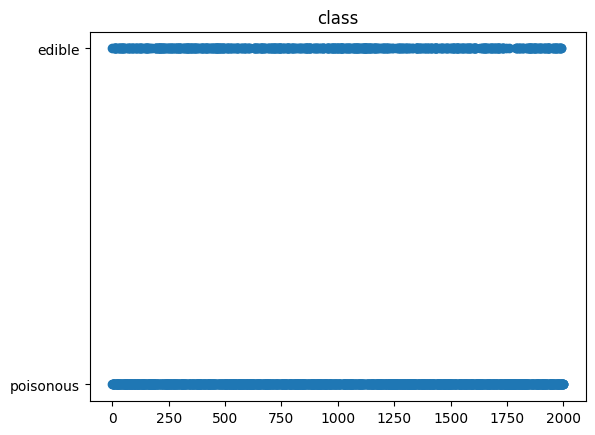

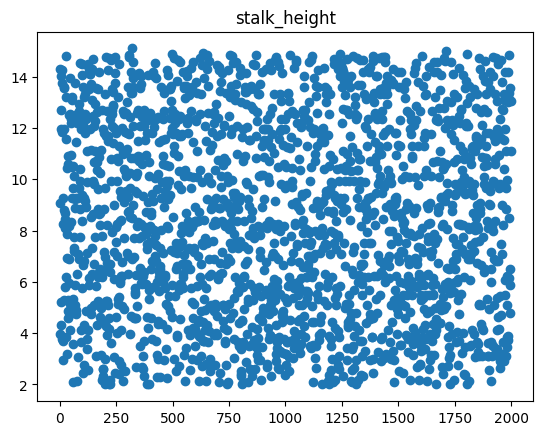

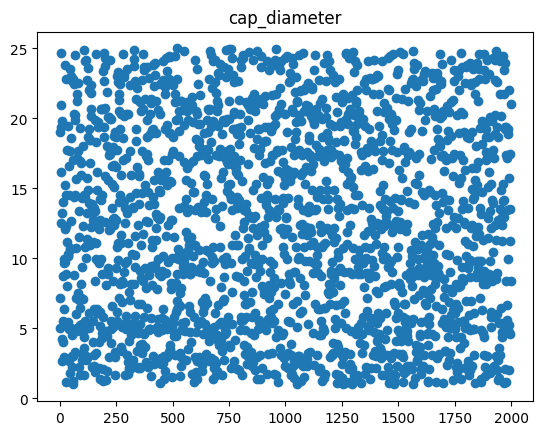

In [5]:
for col in df.columns:
  plt.scatter(df.index, df[col])
  plt.title(col)
  plt.show()

In [6]:
#data transformation
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for column in df.columns:
    df[column] = LE.fit_transform(df[column])

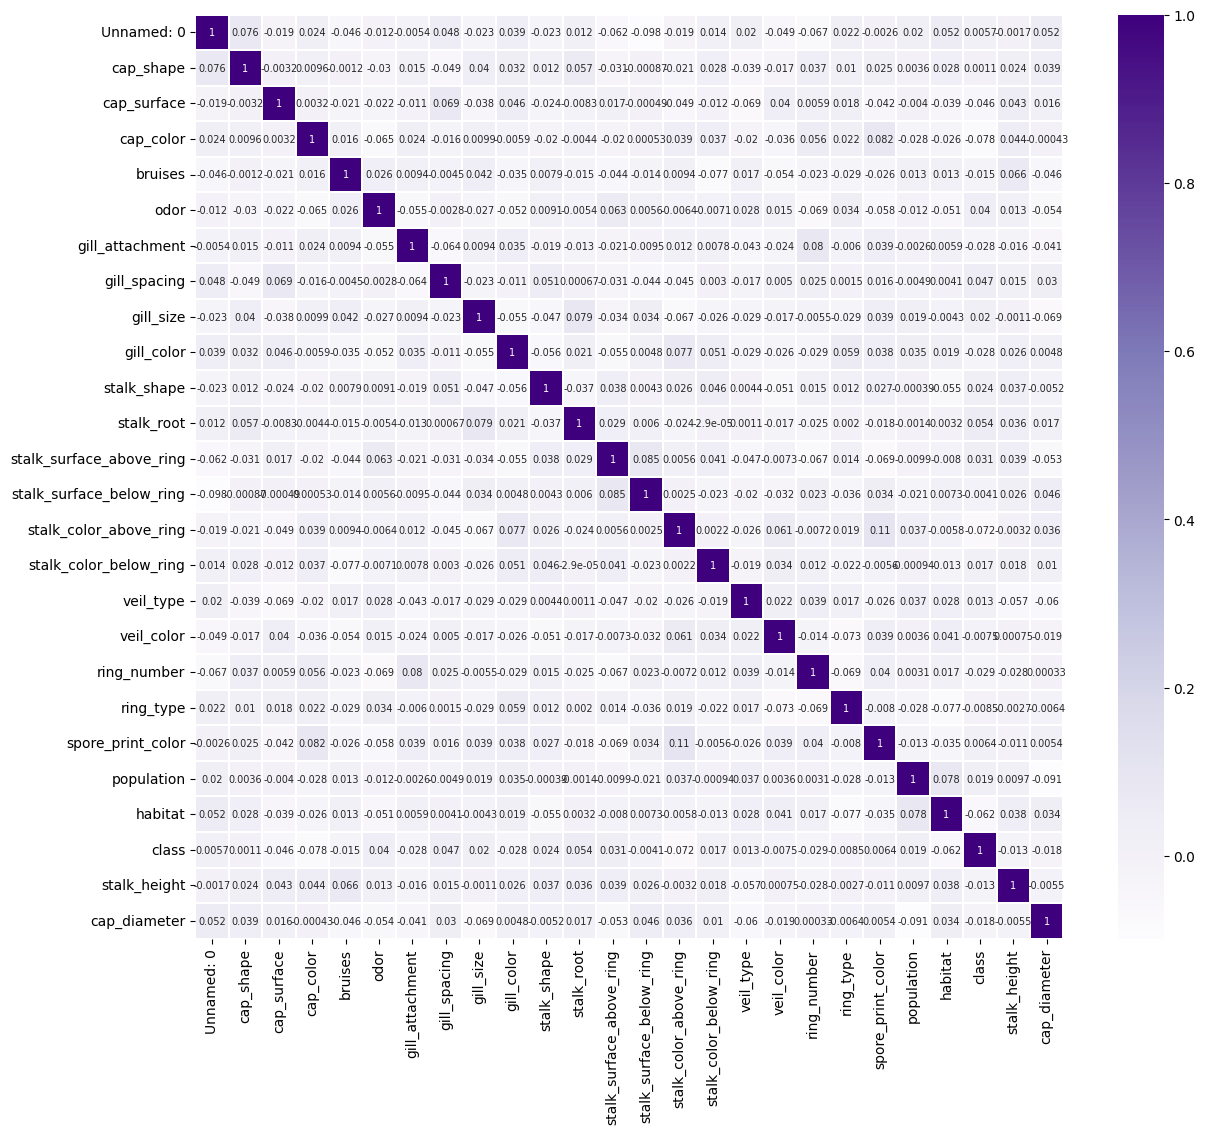

In [7]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);

In [8]:
X = df.drop(['class'], axis=1)  
Y = df["class"]

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np
# import the model
from sklearn.svm import SVC

In [10]:
#Linear Kernal
clf = SVC(C=1.0,kernel='linear')

In [11]:
###  --> Cross validation method
training_acc = []
test_acc = []
traning_loss = []
test_loss = []

In [12]:
from sklearn.metrics import accuracy_score,log_loss
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y,test_size = 0.2)
clf.fit(X_train, Y_train)

SVC(kernel='linear')

In [13]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
training_acc.append(accuracy_score(Y_train,y_pred_train))
test_acc.append(accuracy_score(Y_test,y_pred_test))
traning_loss.append(log_loss(Y_train,y_pred_train))
test_loss.append(log_loss(Y_test,y_pred_test))

In [14]:
print("CV- Traning Accuracy: ",np.mean(training_acc).round(2))
print("CV- Test Accuracy: ",np.mean(test_acc).round(2))
print("CV- Traning loss: ",np.mean(traning_loss).round(2))
print("CV- Test loss: ",np.mean(test_loss).round(2))

CV- Traning Accuracy:  0.7
CV- Test Accuracy:  0.7
CV- Traning loss:  10.81
CV- Test loss:  10.81


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the performance metrics
accuracy = accuracy_score(Y_test, y_pred_test)
precision = precision_score(Y_test, y_pred_test, average='weighted')
recall = recall_score(Y_test, y_pred_test, average='weighted')
f1 = f1_score(Y_test, y_pred_test, average='weighted')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7
Precision: 0.49
Recall: 0.7
F1-score: 0.5764705882352941


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
#Polynomial Kernal degree = 2
clf = SVC(C=1.0,kernel='poly',degree=2)

In [17]:
###  --> Cross validation method
training_acc = []
test_acc = []
traning_loss = []
test_loss = []

In [18]:
from sklearn.metrics import accuracy_score,log_loss
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y,test_size = 0.2)
clf.fit(X_train, Y_train)

SVC(degree=2, kernel='poly')

In [19]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
training_acc.append(accuracy_score(Y_train,y_pred_train))
test_acc.append(accuracy_score(Y_test,y_pred_test))
traning_loss.append(log_loss(Y_train,y_pred_train))
test_loss.append(log_loss(Y_test,y_pred_test))

In [20]:
print("CV- Traning Accuracy: ",np.mean(training_acc).round(2))
print("CV- Test Accuracy: ",np.mean(test_acc).round(2))
print("CV- Traning loss: ",np.mean(traning_loss).round(2))
print("CV- Test loss: ",np.mean(test_loss).round(2))

CV- Traning Accuracy:  0.7
CV- Test Accuracy:  0.71
CV- Traning loss:  10.9
CV- Test loss:  10.45


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the performance metrics
accuracy = accuracy_score(Y_test, y_pred_test)
precision = precision_score(Y_test, y_pred_test, average='weighted')
recall = recall_score(Y_test, y_pred_test, average='weighted')
f1 = f1_score(Y_test, y_pred_test, average='weighted')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.71
Precision: 0.5041
Recall: 0.71
F1-score: 0.5895906432748538


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
#Polynomial Kernal degree = 3
clf = SVC(C=1.0,kernel='poly',degree=3)

In [23]:
from sklearn.metrics import accuracy_score,log_loss
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y,test_size = 0.2)
clf.fit(X_train, Y_train)

SVC(kernel='poly')

In [24]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
training_acc.append(accuracy_score(Y_train,y_pred_train))
test_acc.append(accuracy_score(Y_test,y_pred_test))
traning_loss.append(log_loss(Y_train,y_pred_train))
test_loss.append(log_loss(Y_test,y_pred_test))

In [25]:
print("CV- Traning Accuracy: ",np.mean(training_acc).round(2))
print("CV- Test Accuracy: ",np.mean(test_acc).round(2))
print("CV- Traning loss: ",np.mean(traning_loss).round(2))
print("CV- Test loss: ",np.mean(test_loss).round(2))

CV- Traning Accuracy:  0.7
CV- Test Accuracy:  0.7
CV- Traning loss:  10.85
CV- Test loss:  10.68


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the performance metrics
accuracy = accuracy_score(Y_test, y_pred_test)
precision = precision_score(Y_test, y_pred_test, average='weighted')
recall = recall_score(Y_test, y_pred_test, average='weighted')
f1 = f1_score(Y_test, y_pred_test, average='weighted')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.6975
Precision: 0.48650625
Recall: 0.6975
F1-score: 0.5732032400589102


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
#Rbf kernal
clf = SVC(C=1.0,kernel='rbf',gamma='scale')

In [28]:
from sklearn.metrics import accuracy_score,log_loss
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y,test_size = 0.2)
clf.fit(X_train, Y_train)

SVC()

In [29]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
training_acc.append(accuracy_score(Y_train,y_pred_train))
test_acc.append(accuracy_score(Y_test,y_pred_test))
traning_loss.append(log_loss(Y_train,y_pred_train))
test_loss.append(log_loss(Y_test,y_pred_test))

In [30]:
print("CV- Traning Accuracy: ",np.mean(training_acc).round(2))
print("CV- Test Accuracy: ",np.mean(test_acc).round(2))
print("CV- Traning loss: ",np.mean(traning_loss).round(2))
print("CV- Test loss: ",np.mean(test_loss).round(2))

CV- Traning Accuracy:  0.7
CV- Test Accuracy:  0.69
CV- Traning loss:  10.75
CV- Test loss:  11.05


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the performance metrics
accuracy = accuracy_score(Y_test, y_pred_test)
precision = precision_score(Y_test, y_pred_test, average='weighted')
recall = recall_score(Y_test, y_pred_test, average='weighted')
f1 = f1_score(Y_test, y_pred_test, average='weighted')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.6725
Precision: 0.45225625
Recall: 0.6725
F1-score: 0.540814648729447


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
